## Gradient Descent

Topics that are covered in this notebook:
- Solve a simple linear regression problem by gradient descent.
- We will check the trajectory in parameter space.
- Then we will apply Stochastic Gradient Descent (SGD) and figure out differences with standard one.
- The effect of __shuffling__ the data in SGD.

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# %matplotlib qt

### Data Generation

For simplicity we start with a data that we generate from known distribution. We consider just 2 features X1 and X2 for simplicity. The model is

$Y = b + \theta_1X_1 + \theta_2X_2 + \epsilon$

We consider $X_1$ and $X_2$ as random numbers with uniform distribution on the interval $[0,1]$, and the constant value would be vector of ones. We consider disturbance (error term,  $\epsilon$) as a random noise with normal distribution in the range of $[0,0.5]$. We then consider the following specific values for the parameters:

- $b = 1$
- $\theta_1 = 3$
- $\theta_2 = 5$

In [2]:
# Make random numbers with a fixed seed to make sure we have the same data every time

np.random.seed(1000)

# number of observations
num_obs = 1000

# Generate data based on introduced model
x1 = np.random.uniform(0, 10, num_obs)
x2 = np.random.uniform(0, 10, num_obs)
c = np.ones(num_obs)
e = np.random.normal(0, 0.5, num_obs)

# Parameters
b = 1
theta_1 = 3
theta_2 = 5

# Model 
y = b*c + theta_1*x1 + theta_2*x2 + e

# Making matrix of features
x = np.array([c,x1,x2]).T 

Plot $Y$ value versus $X_1$ and $X_2$.

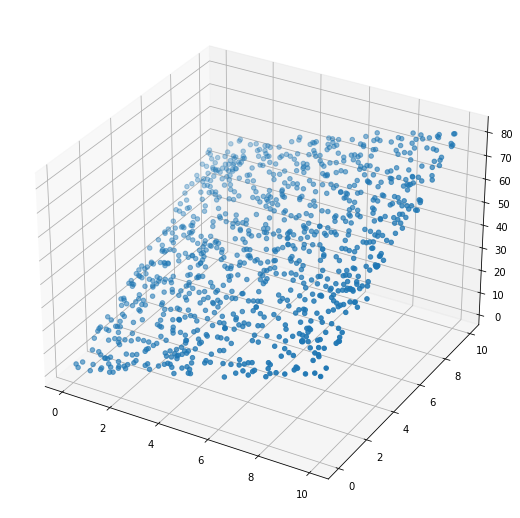

In [3]:
fig, ax = plt.subplots(figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(x1,x2,y)

### Solutions

In the following we will solve this problem via different methods:
- Directly using algebra
- Using `Linear Regression` method in `Scikit Learn` library in python
- By Gradient Descent
- By Stochastic Gradient Descent

#### Directly Using Algebra

We will use formuls $\theta = (X^TX)^{-1}X^Ty$ to directly find the solution, using `linalg` method in `numpy` library.

In [15]:
par = np.linalg.inv(np.dot(x.T,x)).dot(x.T).dot(y)
par = [round(p, 2) for p in par]
par

[1.0, 3.0, 5.0]

#### Using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

# Setup model object and fit to data
lr = LinearRegression()
lr.fit(x,y)

# Coefficients
lr.coef_

array([0.        , 3.00115107, 4.9999718 ])

#### Using Gradient Descent

Examining this method is also useful as Neural Networks use this method for training.
We will examine three different method:
- Full-batch Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

#### Full-batch Gradient Descent

At first we should specify some parameters such as the length of each step (learning rate), number of iterations and also starting point for plotting. We can play with these parameters and see their effect on the results.

In [ ]:
# Parameters
learning_rate = 1e-3
num_iter = 10000
theta_ini = np.array([3,3,3])

In the continue we will examine also Stochastic Gradient Descent (SGD) and compare it with the standard method.